In [1]:

from hamiltonian import Hamiltonian
from rgf import GreensFunction
import numpy as np
import matplotlib.pyplot as plt

In [14]:
ham = Hamiltonian("qpc")
ham.Vg = 1
gf = GreensFunction(ham)
G_R, Gamma_L, Gamma_R = gf.compute_central_greens_function(
    0, use_rgf=False, compute_lesser=False
)
G_R_dense = G_R.toarray()
G_A_dense = G_R_dense.conj().T
Gamma_L_dense = Gamma_L.toarray()
Gamma_R_dense = Gamma_R.toarray()


In [15]:
print(G_A_dense)

[[-3.59663972e+00+5.17432096e-05j -1.69812931e-10-1.07899026e-05j
   2.07901471e-10+1.07898860e-05j ...  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j]
 [-1.69813053e-10-1.07899026e-05j  3.64244264e-11+2.99999539e-06j
  -4.70144776e-11-2.99999078e-06j ...  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j]
 [ 2.07901696e-10+1.07898860e-05j -4.70144776e-11-2.99999078e-06j
  -1.00000000e+00+5.99998156e-06j ...  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j]
 ...
 [ 0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j ... -8.37057229e-01+7.04171093e-01j
  -8.12677530e-02-1.78980694e-02j  2.92291060e-01+6.43718561e-02j]
 [ 0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j ... -8.12746047e-02-1.78995784e-02j
   2.89927269e-01+1.27609375e-01j -1.04276558e+

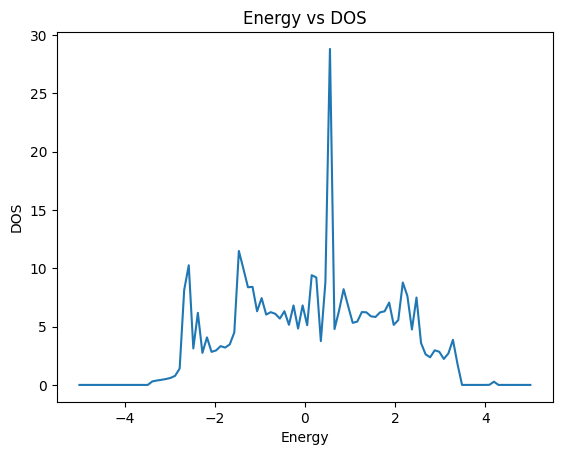

In [9]:
energy = np.linspace(-5,5, 100)
dos = [None] * 100

for ide, e in enumerate(energy):
    dos[ide] = np.sum(gf.compute_density_of_states(E=e))
plt.plot(energy, dos)
plt.ylabel('DOS')
plt.xlabel('Energy')
plt.title('Energy vs DOS')

plt.show()

In [3]:
x1,x2,x3 = ham.get_H00_H01_H10()
gf = GreensFunction(ham)
gf.compute_central_greens_function(E=0, use_rgf=False)

(<Compressed Sparse Column sparse matrix of dtype 'complex128'
 	with 250 stored elements and shape (50, 50)>,
 array([3.88073923e-05-7.63559055e-26j, 2.99999539e-06-7.36829173e-27j,
        4.99998156e-06-5.13700983e-28j, 1.35174771e-01-6.66692469e-18j,
        1.74858137e+00+7.79296300e-17j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.

In [5]:
ham.Vg = 7
gf.compute_conductance()

np.float64(0.0)

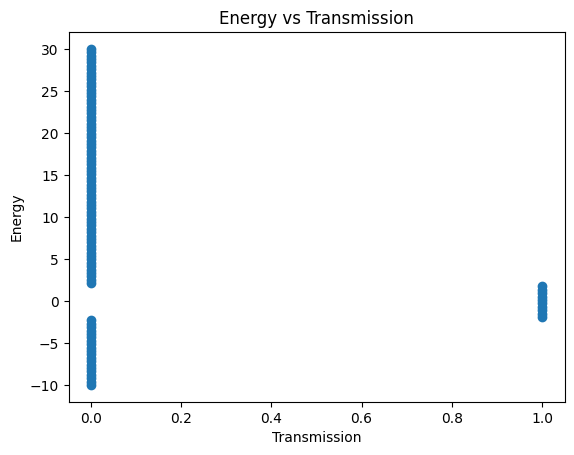

In [ ]:
energy = np.linspace(-10,30, 100)
dos = [None] * 100
gf = GreensFunction(ham)

for ide, e in enumerate(energy):
    dos[ide] = np.real(gf.compute_transmission(E=e))
plt.scatter(dos, energy)
plt.ylabel('Energy')
plt.xlabel('Transmission')
plt.title('Energy vs Transmission')

plt.show()

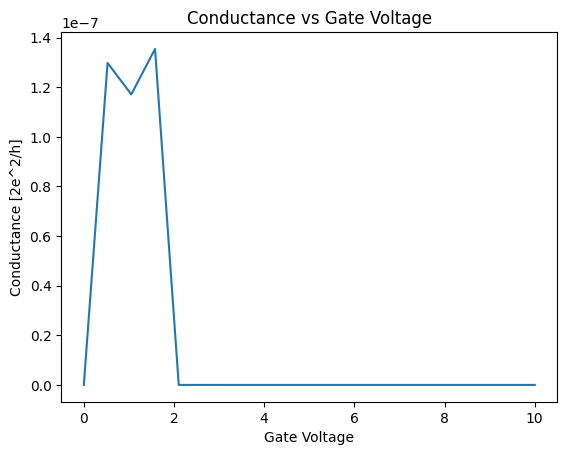

In [8]:
# Example: Sweep gate voltage and plot conductance
gate_voltages = np.linspace(0, 10, 20)
conductance = []

for Vg in gate_voltages:
    ham.o = Vg  # Example: gate voltage shifts onsite energy
    G = gf.compute_conductance(E_F=0.0)
    conductance.append(G)

plt.plot(gate_voltages, conductance)
plt.xlabel('Gate Voltage')
plt.ylabel('Conductance [2e^2/h]')
plt.title('Conductance vs Gate Voltage')
plt.show()